In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

792
0.03
2007-01-01 00:00:00


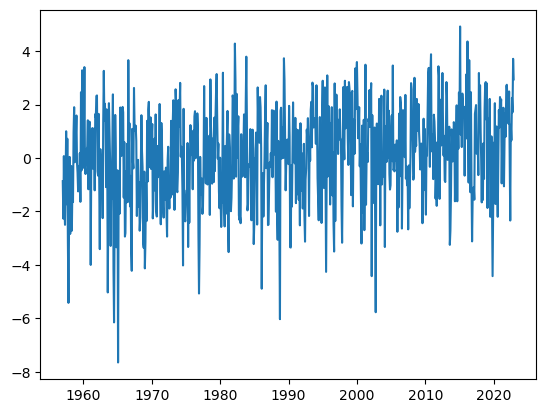

In [2]:
tw = pd.read_csv('./sam_reformat.txt', sep = ',')

d = pd.date_range(start='1/1/1957', end='12/1/2022', freq='MS')    
print(len(d))
sam = np.random.rand(len(d))


ind = 0
for y in range(1957,2023):
    ty = np.array(tw.loc[tw['YEAR'] == y].values)

    sams = (ty[0][1:13])
    sam[ind:ind+12] = sams
    ind = ind+12

plt.figure()
plt.plot(d,sam)

print(sam[600])
print(d[600])

In [ ]:
savenam = 'test2.nc'
data_vars = {'SAM':(['time_counter'], sam,
{'units': 'sam index',
'long_name':'SAM index, see Gareth Marshall'}),
}
# define coordinates
coords = {'time_counter': (['time_counter'], d),
          }
# define global attributes
attrs = {'made in':'SOZONE/MEDUSA/makeYearlyMEDUSAsubsetfiles.ipynb',
'desc': 'yearly medusa files, saving only variables of interest'
}
ds = xr.Dataset(data_vars=data_vars,
coords=coords,
attrs=attrs)
ds.to_netcdf(savenam)